In [ ]:
from google.colab import files
uploaded= files.upload()

Saving forestfires.csv to forestfires.csv


In [ ]:
import pandas as pd
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

True

In [ ]:
df= pd.read_csv('forestfires.csv',error_bad_lines=False)

<ipython-input-25-6e3fef0d8eec>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df= pd.read_csv('forestfires.csv',error_bad_lines=False)


In [ ]:
df



,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [ ]:
!pip install keras
!pip install tensorflow
!pip install scikeras

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras
import tensorflow as tf
from keras.layers import Dense,Dropout
from keras.optimizers import RMSprop,Adam
from keras.models import Sequential
from tensorflow.keras.utils import plot_model
from scikeras.wrappers import KerasClassifier
from sklearn.metrics import accuracy_score,classification_report


In [ ]:
df.drop(df.columns[11:29],axis=1,inplace = True)

In [ ]:
df.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'monthsep', 'size_category'],
      dtype='object')

In [ ]:
df1=df.drop(['monthsep'],axis=1)
df1

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1
1,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,1
2,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,1
3,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1
4,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...
512,1,3,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0
513,1,3,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0
514,1,3,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0
515,1,2,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,1


In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df1['month']= label_encoder.fit_transform(df1['month'])
df1['day']= label_encoder.fit_transform(df1['day'])
df1['size_category']= label_encoder.fit_transform(df1['size_category'])

In [ ]:
df1

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1
1,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,1
2,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,1
3,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1
4,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...
512,1,3,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0
513,1,3,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0
514,1,3,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0
515,1,2,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,1


In [ ]:
target=df1[['size_category']]
target

,size_category
0,1
1,1
2,1
3,1
4,1
...,...
512,0
513,0
514,0
515,1


In [ ]:
features=df1.drop('size_category',axis=1)
features

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...
512,1,3,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,1,3,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,1,3,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,2,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


In [ ]:
from sklearn.preprocessing import StandardScaler
std_sca=StandardScaler()
features1=std_sca.fit_transform(features)

In [ ]:
features1

array([[ 0.28422225, -1.42312073, -0.80595947, ...,  1.49861442,
        -0.07326831, -0.20201979],
       [ 0.97087134,  1.17671466, -0.00810203, ..., -1.74175564,
        -0.07326831, -0.20201979],
       [ 0.97087134, -0.38318657, -0.00810203, ..., -1.51828184,
        -0.07326831, -0.20201979],
       ...,
       [-1.08907592,  0.13678051, -1.64008316, ...,  1.49861442,
        -0.07326831, -0.02653216],
       [-1.08907592, -0.38318657,  0.68095666, ..., -0.00983371,
        -0.07326831, -0.20201979],
       [ 0.74198831,  1.17671466, -2.02087875, ...,  0.26950853,
        -0.07326831, -0.20201979]])

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(features1,target,train_size=0.7,random_state=100)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(361, 11)
(156, 11)
(361, 1)
(156, 1)


In [ ]:
epochs=50
batch_size=10


In [ ]:
model= Sequential()
model.add(Dense(14,activation='relu',input_shape=(11,)))
model.add(Dense(12,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 14)                168       
                                                                 
 dense_13 (Dense)            (None, 12)                180       
                                                                 
 dense_14 (Dense)            (None, 1)                 13        
                                                                 
Total params: 361 (1.41 KB)
Trainable params: 361 (1.41 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


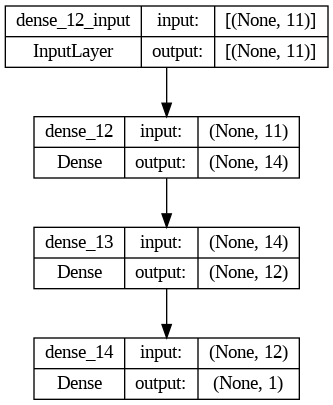

In [ ]:
plot_model(model,to_file='model.png',show_shapes=True)

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics='accuracy')

In [ ]:
history=model.fit(x_train,y_train,epochs=epochs,batch_size=batch_size,verbose=2,validation_data=(x_test,y_test),validation_split=0.33)

Epoch 1/50
37/37 - 1s - loss: 0.7815 - accuracy: 0.3823 - val_loss: 0.7264 - val_accuracy: 0.4295 - 1s/epoch - 34ms/step
Epoch 2/50
37/37 - 0s - loss: 0.6701 - accuracy: 0.6011 - val_loss: 0.6626 - val_accuracy: 0.6410 - 188ms/epoch - 5ms/step
Epoch 3/50
37/37 - 0s - loss: 0.6069 - accuracy: 0.6759 - val_loss: 0.6383 - val_accuracy: 0.6923 - 153ms/epoch - 4ms/step
Epoch 4/50
37/37 - 0s - loss: 0.5684 - accuracy: 0.7341 - val_loss: 0.6319 - val_accuracy: 0.7179 - 163ms/epoch - 4ms/step
Epoch 5/50
37/37 - 0s - loss: 0.5419 - accuracy: 0.7452 - val_loss: 0.6313 - val_accuracy: 0.7372 - 191ms/epoch - 5ms/step
Epoch 6/50
37/37 - 0s - loss: 0.5217 - accuracy: 0.7590 - val_loss: 0.6320 - val_accuracy: 0.7500 - 151ms/epoch - 4ms/step
Epoch 7/50
37/37 - 0s - loss: 0.5041 - accuracy: 0.7701 - val_loss: 0.6296 - val_accuracy: 0.7628 - 189ms/epoch - 5ms/step
Epoch 8/50
37/37 - 0s - loss: 0.4883 - accuracy: 0.7839 - val_loss: 0.6285 - val_accuracy: 0.7692 - 187ms/epoch - 5ms/step
Epoch 9/50
37/37 -

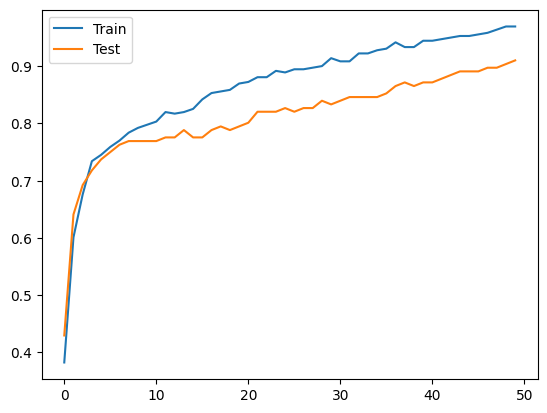

In [ ]:
plt.plot(range(50),history.history['accuracy'],label='Train')
plt.plot(range(50),history.history['val_accuracy'],label='Test')
plt.legend()

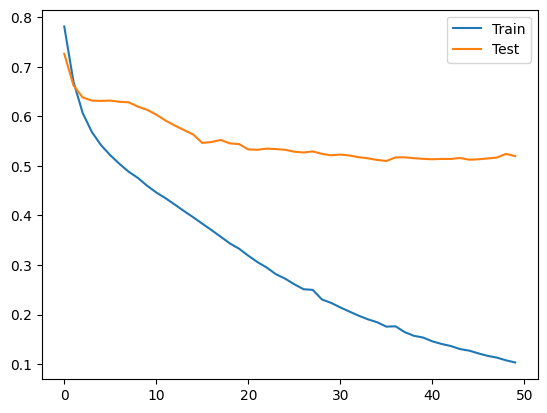

In [ ]:
plt.plot(range(50),history.history['loss'],label='Train')
plt.plot(range(50),history.history['val_loss'],label='Test')
plt.legend()

In [ ]:
y_pred= model.predict(x_test)
y_pred

5/5 [==============================] - 0s 4ms/step


array([[1.44293271e-02],
       [5.09546399e-01],
       [9.95476544e-01],
       [9.20951784e-01],
       [9.87511516e-01],
       [7.57482648e-01],
       [6.10490213e-04],
       [9.04525876e-01],
       [2.65752494e-01],
       [9.73587394e-01],
       [9.92440939e-01],
       [1.51566078e-03],
       [9.86034513e-01],
       [8.73172998e-01],
       [9.75334048e-01],
       [9.93082881e-01],
       [7.70225942e-01],
       [9.06632066e-01],
       [9.63449776e-01],
       [8.49537611e-01],
       [9.92865682e-01],
       [9.96165276e-01],
       [8.70425794e-08],
       [9.04622316e-01],
       [9.96048868e-01],
       [9.83002841e-01],
       [9.68830109e-01],
       [8.64260912e-01],
       [8.83131027e-01],
       [9.47960615e-01],
       [9.66512442e-01],
       [9.35153544e-01],
       [9.42545831e-01],
       [9.81203973e-01],
       [9.67276469e-03],
       [2.64328271e-01],
       [9.88326013e-01],
       [9.88032937e-01],
       [5.85932672e-01],
       [8.65347862e-01],


In [ ]:
a = StandardScaler()
a.fit(features)
features_standardized = a.transform(features)

In [ ]:
pd.DataFrame(features_standardized).describe()

,0,1,2,3,4,5,6,7,8,9,10
count,517.000000,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02
mean,0.000000,5.153840e-17,-1.752306e-15,-2.748715e-17,6.871787e-17,1.030768e-17,2.542561e-16,2.198972e-16,-4.191790e-16,-6.871787e-18,4.123072e-17
std,1.000969,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00
min,-1.317959,-1.423121e+00,-1.304582e+01,-1.715608e+00,-2.179108e+00,-1.980578e+00,-2.876943e+00,-1.796637e+00,-2.021098e+00,-7.326831e-02,-2.020198e-01
25%,-1.089076,-9.031536e-01,-8.063453e-02,-6.606652e-01,-4.448281e-01,-5.535954e-01,-5.842379e-01,-6.924563e-01,-7.361236e-01,-7.326831e-02,-2.020198e-01
50%,0.055339,1.367805e-01,1.732292e-01,-4.020255e-02,4.691190e-01,-1.364774e-01,7.082076e-02,-1.403660e-01,-9.833712e-03,-7.326831e-02,-1.938429e-01
75%,1.199754,6.567476e-01,4.089598e-01,4.927389e-01,6.696628e-01,3.904086e-01,6.741643e-01,5.344111e-01,4.929823e-01,-7.326831e-02,-9.870852e-02
max,1.199754,1.696682e+00,1.007353e+00,2.819865e+00,1.261610e+00,1.033538e+01,2.484195e+00,3.417549e+00,3.007063e+00,2.157228e+01,1.695111e+01


In [ ]:
print(y_test)


     size_category
217              0
260              0
142              1
152              1
255              1
..             ...
287              1
21               1
271              0
407              1
393              1

[156 rows x 1 columns]
